# Step 1: Brief description of the problem and data (5 pts)
https://www.kaggle.com/competitions/nlp-getting-started/overview

In this project, our target is to create an modle to identify whether a person’s words are actually announcing a disaster.

- There are two datasets, a training and testing. 
- The training set contains 7503 tweets that were classified.The test set contains  3263 unclassified tweets.
- Each tweets in training set have been labeled either a 0 or 1,which means whether it's actually announcing a disaster. 
- Finally I will predict the testing set by the model which trained by training set. And send the result to the competition in Kaggle.

# Step 2: Exploratory Data Analysis (EDA) — Inspect, Visualize and Clean the Data (15 pts)


### Inspect & Visualize
* Drop duplicates tweets
* Show the class distribution of training set
* Show the characters in a tweets from different class of training set
* Show the number of words in a tweet from different class of training set
* Show the top 10 Common words of training set
* Show the WordCloud after cleaning

### Data Cleaning: 
* Removing HTML tags
* Removing urls
* Removing stopwords and not alphabet

### Text Processing: 
* Tokenization
* Padding
* Embedding


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from collections import  Counter
import matplotlib.pyplot as plt
import plotly.express as px
import tensorflow as tf
import pandas as pd

### Inspect & Visualize


In [3]:
train_df = pd.read_csv('train.csv')
submit_df = pd.read_csv('test.csv')

In [4]:
# drop_duplicates
train_df = train_df.loc[train_df['text'].drop_duplicates().index]
# shap of data
print('train:',train_df.shape)
print('test:',submit_df.shape)

train: (7503, 5)
test: (3263, 4)


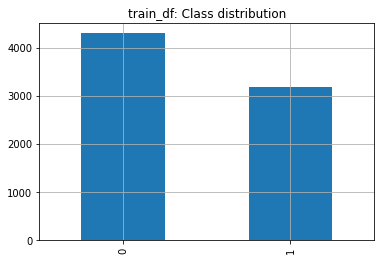

In [5]:
train_df['target'].value_counts().plot(kind='bar',grid=True)
plt.title('train_df: Class distribution')
plt.show()

Characters in a tweets from different class


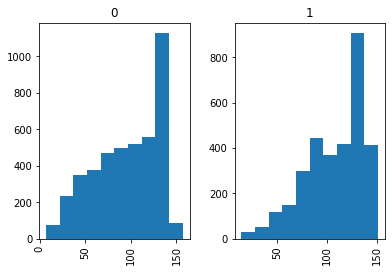

In [6]:
print('Characters in a tweets from different class')
train_df['text'].str.len().hist(by=train_df['target'])
plt.show()

Number of words in a tweet from different class


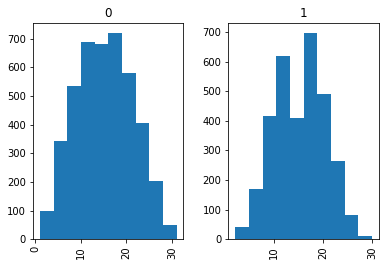

In [7]:
print('Number of words in a tweet from different class')
train_df['text'].apply(lambda x: len(x.split())).hist(by=train_df['target'])
plt.show()

Top 10 Common words


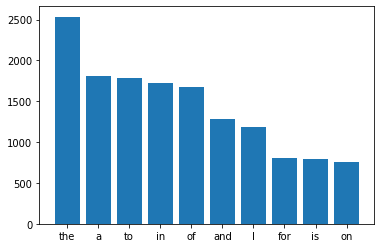

In [8]:
print('Top 10 Common words')
all_words=[]
for x in train_df['text'].str.split():
    for i in x:
        all_words.append(i)
counter = Counter(all_words)
most = counter.most_common()[:10]
plt.bar([i[0] for i in most],[i[1] for i in most]) 
plt.show()

### Data Cleaning: 
* Removing HTML tags
* Removing urls
* Removing stopwords and not alphabet


In [9]:
from nltk import word_tokenize
from nltk.corpus import stopwords
import re
# import string

In [10]:
# # Removing punctuation
# def remove_punct(text):
#     for punc in string.punctuation:
#         text = text.replace(punc,'')
#     return text

# Removing HTML tags
def remove_html(text):
    html=re.compile(r'<.*?>')
    return html.sub(r'',text)

# Removing urls
def remove_URL(text):
    url = re.compile(r'https?://\S+|www\.\S+')
    return url.sub(r'',text)

# Removing stopwords and not alphabet
stops = set(stopwords.words("english"))
def remove_stops(text):
    return ' '.join([word for word in word_tokenize(text.lower()) if((word.isalpha()==1) & (word not in stops))]  )

def clean_text(text):
#     text = remove_punct(text)
    text = remove_html(text)
    text = remove_URL(text)
    text = remove_stops(text)
    return text

In [11]:
train_df['cleaned_text'] = train_df['text'].apply(lambda x : clean_text(x))
submit_df['cleaned_text'] = submit_df['text'].apply(lambda x : clean_text(x))

In [12]:
train_df.head()[['text','cleaned_text']]

,text,cleaned_text
0,Our Deeds are the Reason of this #earthquake M...,deeds reason earthquake may allah forgive us
1,Forest fire near La Ronge Sask. Canada,forest fire near la ronge sask canada
2,All residents asked to 'shelter in place' are ...,residents asked place notified officers evacua...
3,"13,000 people receive #wildfires evacuation or...",people receive wildfires evacuation orders cal...
4,Just got sent this photo from Ruby #Alaska as ...,got sent photo ruby alaska smoke wildfires pou...


#### Show the top 10 Common words after cleaning

Top 10 Common words


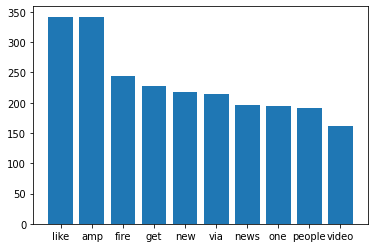

In [13]:
print('Top 10 Common words')
all_words=[]
for x in train_df['cleaned_text'].str.split():
    for i in x:
        all_words.append(i)
counter = Counter(all_words)
most = counter.most_common()[:10]
plt.bar([i[0] for i in most],[i[1] for i in most]) 
plt.show()

#### Show the WordCloud after cleaning

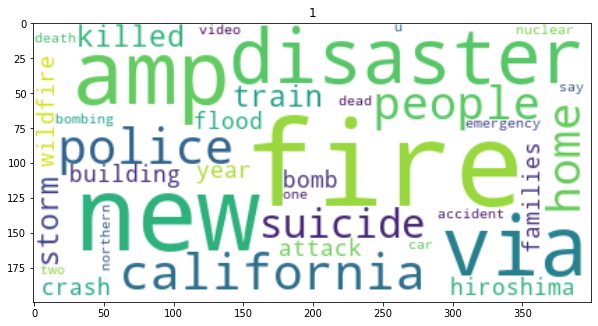

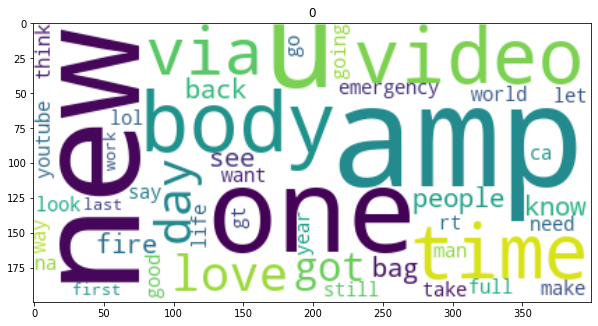

In [14]:
from wordcloud import WordCloud

for cate in [1,0]:
    temp_df = train_df[train_df['target']==cate]
    string = (temp_df['cleaned_text']+' ').sum()
    wordcloud = WordCloud(
            background_color ='white',
            min_font_size = 10,
            collocations=False,
                ).generate(string)

    # 繪圖
    plt.figure(figsize=(10,8))
    plt.title(cate)
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.show()

### Text Processing: 
* Tokenization
* Padding
* Embedding

#### Tokenization
1. Find the most common 2000 words from the training data to build a dictionary.
2. Use the dictionary to convert each words in the DataFrame into a number.

In [15]:
# Splitting the data 0.1 as test
train_df, test_df = train_test_split(train_df, test_size=0.1, random_state=42)

In [16]:
# Fitting to the input data
# Find the most common 2000 words from the training data to build a dictionary
num_words=2000
token = Tokenizer(num_words=num_words, oov_token='OOV')#, oov_token='OOV'
token.fit_on_texts(train_df['cleaned_text']) #[train_df['target']==1]
# show the words dict:
# token.word_index 

In [17]:
token = Tokenizer(num_words=num_words)#, oov_token='OOV'
token.fit_on_texts(train_df[train_df['target']==1]['cleaned_text'])

In [18]:
x_train_seq = token.texts_to_sequences(train_df["cleaned_text"])
x_test_seq = token.texts_to_sequences(test_df["cleaned_text"])
x_submit_seq = token.texts_to_sequences(submit_df["cleaned_text"])

pd.DataFrame(x_train_seq).head()

#

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,988.0,520.0,380.0,736.0,107.0,1184.0,74.0,1954.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,155.0,155.0,209.0,97.0,1246.0,238.0,369.0,98.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,460.0,228.0,689.0,153.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1536.0,1827.0,1268.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1063.0,132.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN



#### pad_sequence


You will find that the length of each text is different.

So we truncated each text to take 50 words for training (we cannot handle texts of different lengths during training).

Pads zeros in sequence to make the length of sequences equal.

In [19]:
# Pads zeros in sequence to make the length of sequences equal
max_length = 50
x_train_pad = pad_sequences(x_train_seq, maxlen=max_length) #, padding='post'
x_test_pad = pad_sequences(x_test_seq, maxlen=max_length)
x_submit_pad = pad_sequences(x_submit_seq, maxlen=max_length)

In [20]:
pd.DataFrame(x_train_pad).head()

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0,0,0,0,0,0,0,0,0,0,...,0,0,988,520,380,736,107,1184,74,1954
1,0,0,0,0,0,0,0,0,0,0,...,0,0,155,155,209,97,1246,238,369,98
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,460,228,689,153
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1536,1827,1268
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1063,132


#### Embedding
Embedding: Turn the original number into a N-dimensional vector

Use keras package do the Embedding process in the model.

* input_dim: Size of the vocabulary.
* output_dim: Dimension of the dense embedding.
* input_length: Length of input sequences

# Step 3 : Model Architecture (25 pts)
Here I build SimpleRNN and LSTM models and compared the performance between the two


In [22]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Embedding, LSTM, SimpleRNN
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

Using TensorFlow backend.


In [23]:
def model_fit(model):
    # If val_loss does not decrease in next 5 epochs, Model will stop training.
    earlystopper = EarlyStopping(monitor='val_loss',
                                 patience=3,
                                 verbose=0,
                                 restore_best_weights=True)

    # Automatically to adjust the learning rate, When val_loss stop decreasing in next 2 epochs, reduce the learning rate.
    reducel = ReduceLROnPlateau(monitor='val_loss',
                                patience=1,
                                verbose=0,
                                factor=0.3)

    y_train = train_df['target']
    history = model.fit(x_train_pad,
                        y_train,
                        verbose=0,
                        batch_size=64,
                        epochs=30,
                        validation_split=0.1,
                        callbacks=[reducel, earlystopper])
    return history,model

In [24]:
def build_LSTM_Architecture():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_length))
    model.add(Dropout(0.2))
    model.add(LSTM(16,return_sequences=True))
    model.add(LSTM(16,return_sequences=False))
    model.add(Dense(256, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(units=1, activation='sigmoid'))
    # Compile the model
    model.compile(Adam(0.0001), loss = "binary_crossentropy", metrics=["accuracy"])
    model.summary()
    return model_fit(model)

In [25]:
def build_SimpleRNN_Architecture():
    model = Sequential()
    model.add(Embedding(input_dim=num_words, output_dim=32, input_length=max_length))
    model.add(Dropout(0.2))
    model.add(SimpleRNN(units=16))
    model.add(Dense(units=256, activation='relu'))
    model.add(Dropout(0.35))
    model.add(Dense(units=1, activation='sigmoid'))
    # Compile the model
    model.compile(Adam(0.0001), loss = "binary_crossentropy", metrics=["accuracy"])
    model.summary()
    return model_fit(model)

In [26]:
LSTM_history,LSTM_model = build_LSTM_Architecture()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 50, 32)            64000     
_________________________________________________________________
dropout_1 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50, 16)            3136      
_________________________________________________________________
lstm_2 (LSTM)                (None, 16)                2112      
_________________________________________________________________
dense_1 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [27]:
SimpleRNN_history,SimpleRNN_model = build_SimpleRNN_Architecture()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 32)            64000     
_________________________________________________________________
dropout_3 (Dropout)          (None, 50, 32)            0         
_________________________________________________________________
simple_rnn_1 (SimpleRNN)     (None, 16)                784       
_________________________________________________________________
dense_3 (Dense)              (None, 256)               4352      
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 257       
Total params: 69,393
Trainable params: 69,393
Non-trainable params: 0
__________________________________________________

C:\ProgramData\Anaconda3\lib\site-packages\tensorflow_core\python\framework\indexed_slices.py:433: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


# Step 4 : Results and Analysis (35 pts)
1. Set model training callback for early stop, and automatically adjust the learning rate.
2. Observe how the training and validation accuracy changes as the training time increases. We can find that after the learning rate is reduced, the growth of both train and val becomes slow and flat. This avoids overfitting.
3. Observing the performance, LSTM is better than SimpleRNN
    *  LSTM_auc_score: 0.8368
    *  LSTM_accuracy: 0.7869
    *  SimpleRNN_auc_score: 0.8320
    *  SimpleRNN_accuracy: 0.7736
4. Predict submission data, Public Score of Kaggle: 0.7916
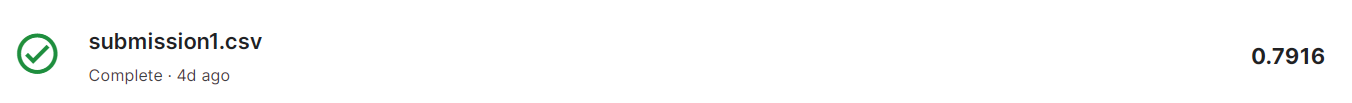

In [28]:
def print_accuracyloss(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc,label='Training accuracy')
    plt.plot(epochs, val_acc,label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.legend(loc=0)
    plt.grid(True)
    plt.figure()

    plt.plot(epochs, loss, label='Training loss')
    plt.plot(epochs, val_loss,label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend(loc=0)
    plt.grid(True)
    plt.show()

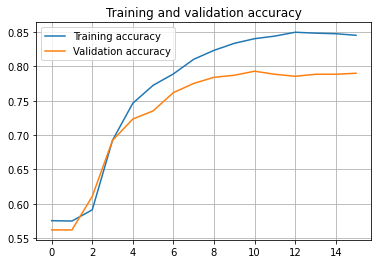

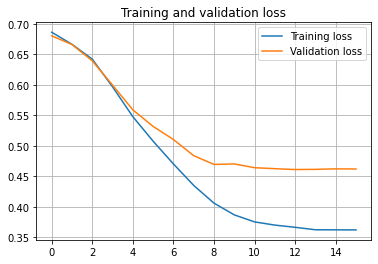

In [29]:
print_accuracyloss(LSTM_history)

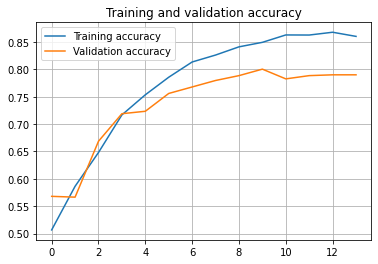

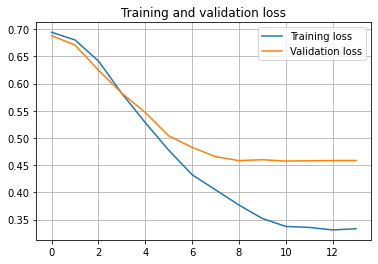

In [30]:
print_accuracyloss(SimpleRNN_history)

In [31]:
from sklearn.metrics import roc_curve, auc, roc_auc_score, accuracy_score, confusion_matrix

In [32]:
def predict_text(model):
    pred = model.predict(x_test_pad)
    pred_df = test_df.copy()
    pred_df['pred']=pred
    fpr_keras, tpr_keras, thresholds_keras = roc_curve(pred_df['target'], pred_df['pred'])
    pred_df['pred_bollin'] = [1 if x>0.50 else 0 for x in pred]
    print('auc_score:', auc(fpr_keras, tpr_keras))
    print('accuracy:', accuracy_score(pred_df['target'], pred_df['pred_bollin']))
    print('confusion_matrix:')
    print(confusion_matrix(pred_df['target'], pred_df['pred_bollin']))

In [33]:
predict_text(LSTM_model)

auc_score: 0.834969547563805
accuracy: 0.7802929427430093
confusion_matrix:
[[375  56]
 [109 211]]


In [34]:
predict_text(SimpleRNN_model)

auc_score: 0.8375
accuracy: 0.7789613848202397
confusion_matrix:
[[380  51]
 [115 205]]


### Predict submission data

In [35]:
sample_submission = pd.read_csv('sample_submission.csv')
pred = LSTM_model.predict(x_submit_pad)
sample_submission['target']=[1 if x>0.50 else 0 for x in pred]
sample_submission.to_csv('submission1.csv',index=False)

<AxesSubplot:>

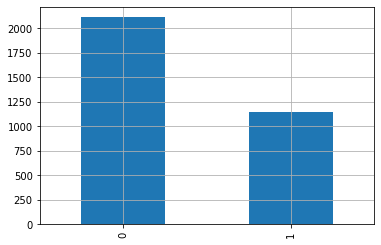

In [36]:
sample_submission['target'].value_counts().plot(kind='bar',grid=True)

# Step 5: Conclusion (15 pts)
* Text data has a lot of dirty data but it is not easy to detect. So we need to do visualizations to find the problem and clean it up, like removing HTML tags, urls, stop words and non-alphabet characters.
* In this project, Tokenization, pad_sequence and Embedding are very important. It was nice to get more familiar with their usage and rationale after this project.
* Set model training callback for early stop, and automatically adjust the learning rate to avoids overfitting. We can observe how the training and validation accuracy changes as the training time increases. And find that after the learning rate is reduced, the growth of both train and val becomes slow and flat.
* Here I build SimpleRNN and LSTM models and compared the performance between the two. Observing the accuracy, LSTM 0.7869 is better than SimpleRNN 0.7736.Predict submission data, Public Score of Kaggle is 0.7916
* The Public Score of Kaggle is 0.7916 , In order to get improved, I will try more detailed text cleaning and deeper model architecture.